In [1]:
!pip install pyspark

     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.2/316.9 MB 5.3 MB/s eta 0:01:00
     --------------------------------------- 0.9/316.9 MB 13.9 MB/s eta 0:00:23
     --------------------------------------- 2.1/316.9 MB 18.8 MB/s eta 0:00:17
     --------------------------------------- 3.3/316.9 MB 23.2 MB/s eta 0:00:14
      -------------------------------------- 4.6/316.9 MB 26.7 MB/s eta 0:00:12
      -------------------------------------- 5.8/316.9 MB 26.7 MB/s eta 0:00:12
      -------------------------------------- 7.1/316.9 MB 28.5 MB/s eta 0:00:11
     - ------------------------------------- 8.4/316.9 MB 29.8 MB/s eta 0:00:11
     - ------------------------------------- 9.6/316.9 MB 29.3 MB/s eta 0:00:11
     - ------------------------------------ 10.9/316.9 MB 34.4 MB/s eta 0:00:09
     - ------------------------------------ 12.2/316.9 MB 34.4 MB/s eta 0:00:09
     - ------------------------------------ 13.

In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
spark

In [7]:
#Import os so I can find the path to my working directory
import os
os.getcwd()

'C:\\Users\\ojial\\Documents\\Derby Masters\\Processing Big Data\\Assesment\\Dataset_Final\\DataSet_final'

In [5]:
#assigning the working directory path to a variable so I can use it at a later time
data_path = 'C:\\Users\\ojial\\Documents\\Derby Masters\\Processing Big Data\\Assesment\\Dataset_Final\\DataSet_final'

#file_path = data_path + "/DimAccount.csv"
#df = spark.read.format("csv").option("header", "true").load(file_path)

In [6]:
#Assigning the data path and the files I will be using for analysis 

DimAccount = data_path + "/DimAccount.csv"
DimCurrency = data_path + "/DimCurrency.csv"
DimCustomer = data_path + "/DimCustomer.csv"
DimDate = data_path + "/DimDate.csv"
DimDatev2 = data_path + "/DimDatev2.csv"
DimDepartmentGroup = data_path + "/DimDepartmentGroup.csv"
DimGeography = data_path + "/DimGeography.csv"
DimOrganization = data_path + "/DimOrganization.csv"
DimProduct = data_path + "/DimProduct.csv"
DimProductCategory = data_path + "/DimProductCategory.csv"
DimProductSubcategory = data_path + "/DimProductSubcategory.csv"
DimPromotion = data_path + "/DimPromotion.csv"
DimReseller = data_path + "/DimReseller.csv"
DimSalesReason = data_path + "/DimSalesReason.csv"
DimSalesTerritory = data_path + "/DimSalesTerritory.csv"
DimScenario = data_path + "/DimScenario.csv"
FactCallCenter = data_path + "/FactCallCenter.csv"
FactCurrencyRate = data_path + "/FactCurrencyRate.csv"
FactFinance = data_path + "/FactFinance.csv"
FactInternetSales = data_path + "/FactInternetSales.csv"
FactSalesTargets = data_path + "/FactSalesTargets.csv"


In [7]:
#loading each file into a datafram with the same name as the file so as to make my code readable

DimAccount = spark.read.format("csv").option("header", "true").load(DimAccount)

DimCurrency = spark.read.format("csv").option("header", "true").load(DimCurrency)

DimCustomer = spark.read.format("csv").option("header", "true").load(DimCustomer)

DimDate = spark.read.format("csv").option("header", "true").load(DimDate)

#DimDatev2 = spark.read.format("csv").option("header", "true").load(DimDatev2)

DimDepartmentGroup = spark.read.format("csv").option("header", "true").load(DimDepartmentGroup)

DimGeography = spark.read.format("csv").option("header", "true").load(DimGeography)

DimOrganization = spark.read.format("csv").option("header", "true").load(DimOrganization)

DimProduct = spark.read.format("csv").option("header", "true").load(DimProduct)

DimProductCategory = spark.read.format("csv").option("header", "true").load(DimProductCategory)

DimProductSubcategory = spark.read.format("csv").option("header", "true").load(DimProductSubcategory)

DimPromotion = spark.read.format("csv").option("header", "true").load(DimPromotion)

DimReseller = spark.read.format("csv").option("header", "true").load(DimReseller)

DimSalesReason = spark.read.format("csv").option("header", "true").load(DimSalesReason)

DimSalesTerritory = spark.read.format("csv").option("header", "true").load(DimSalesTerritory)

DimScenario = spark.read.format("csv").option("header", "true").load(DimScenario)

FactCallCenter = spark.read.format("csv").option("header", "true").load(FactCallCenter)

FactCurrencyRate = spark.read.format("csv").option("header", "true").load(FactCurrencyRate)

FactFinance = spark.read.format("csv").option("header", "true").load(FactFinance)

FactInternetSales = spark.read.format("csv").option("header", "true").load(FactInternetSales)

FactSalesTargets = spark.read.format("csv").option("header", "true").load(FactSalesTargets)


In [8]:
FactSalesTargets.show(5)

+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|Row|SalesTerritoryKey|SalesTerritoryRegion|SalesTerritoryGroup|SalesTerritoryCountry|CalendarYear|   DateKey|SalesAmountQuote|
+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|  1|                1|           Northwest|      North America|        United States|        2006|01/01/2006|         2693000|
|  2|                1|           Northwest|      North America|        United States|        2007|01/01/2007|         4102000|
|  3|                1|           Northwest|      North America|        United States|        2008|01/01/2008|         2321000|
|  4|                1|           Northwest|      North America|        United States|        2005|01/01/2005|         1213000|
|  5|                2|           Northeast|      North America|        United States|        2005|01/01

In [8]:
FactSalesTargets.count()

38

In [9]:
#importing col and format_number so I can cleab the dataset with the functions 
from pyspark.sql.functions import col,format_number

In [10]:
from pyspark.sql import functions as F

In [49]:
#FactSalesTargets.groupBy("SalesTerritoryGroup").agg(F.sum(FactSalesTargets.SalesAmountQuote)).collect()

[Row(SalesTerritoryGroup='Europe', sum(SalesAmountQuote)=18358000.0),
 Row(SalesTerritoryGroup='NA', sum(SalesAmountQuote)=2386000.0),
 Row(SalesTerritoryGroup='North America', sum(SalesAmountQuote)=73283000.0),
 Row(SalesTerritoryGroup='Pacific', sum(SalesAmountQuote)=1687000.0)]

# Cleaning the dataset

Looking at the Schema some numeric columns are stored as string, we can correct this by using the cast function

In [54]:
FactSalesTargets.printSchema()

root
 |-- Row: string (nullable = true)
 |-- SalesTerritoryKey: string (nullable = true)
 |-- SalesTerritoryRegion: string (nullable = true)
 |-- SalesTerritoryGroup: string (nullable = true)
 |-- SalesTerritoryCountry: string (nullable = true)
 |-- CalendarYear: string (nullable = true)
 |-- DateKey: string (nullable = true)
 |-- SalesAmountQuote: string (nullable = true)



In [11]:
FactSalesTargets = FactSalesTargets.withColumn("SalesAmountQuote",FactSalesTargets["SalesAmountQuote"].cast('bigint'))

In [12]:
FactInternetSales = FactInternetSales.withColumn("SalesAmount",FactInternetSales["SalesAmount"].cast('bigint'))

In [13]:
FactSalesTargets.printSchema()

root
 |-- Row: string (nullable = true)
 |-- SalesTerritoryKey: string (nullable = true)
 |-- SalesTerritoryRegion: string (nullable = true)
 |-- SalesTerritoryGroup: string (nullable = true)
 |-- SalesTerritoryCountry: string (nullable = true)
 |-- CalendarYear: string (nullable = true)
 |-- DateKey: string (nullable = true)
 |-- SalesAmountQuote: long (nullable = true)



Looking at distinct values from the SalesTargets, we can see that only 4 years are contained in the dataset with regards to target. 

In [14]:
FactSalesTargets.select("CalendarYear").distinct().show()

+------------+
|CalendarYear|
+------------+
|        2005|
|        2006|
|        2008|
|        2007|
+------------+



In [15]:
FactSalesTargets.groupBy("SalesTerritoryGroup").sum("SalesAmountQuote").show()

+-------------------+---------------------+
|SalesTerritoryGroup|sum(SalesAmountQuote)|
+-------------------+---------------------+
|             Europe|             18358000|
|                 NA|              2386000|
|      North America|             73283000|
|            Pacific|              1687000|
+-------------------+---------------------+



In [16]:
FactSalesTargets.filter(FactSalesTargets["CalendarYear"]==2008).groupBy("SalesTerritoryGroup").sum("SalesAmountQuote").show()

+-------------------+---------------------+
|SalesTerritoryGroup|sum(SalesAmountQuote)|
+-------------------+---------------------+
|             Europe|              4820000|
|                 NA|               421000|
|      North America|             12349000|
|            Pacific|               820000|
+-------------------+---------------------+



In [17]:
#Looking at the internet sales data we see that data set is large

FactInternetSales.show(5)

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+--------------------+--------------------+--------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|           OrderDate|             DueDate|            ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+-----

In [18]:
#using count to see how many rows are in the dataset 
FactInternetSales.count()

60398

In [19]:
#viewing the list of column names in the internet sales data
FactInternetSales.columns

['ProductKey',
 'OrderDateKey',
 'DueDateKey',
 'ShipDateKey',
 'CustomerKey',
 'PromotionKey',
 'CurrencyKey',
 'SalesTerritoryKey',
 'SalesOrderNumber',
 'SalesOrderLineNumber',
 'RevisionNumber',
 'OrderQuantity',
 'UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'CarrierTrackingNumber',
 'CustomerPONumber',
 'OrderDate',
 'DueDate',
 'ShipDate']

In [20]:
#Due to how large the data set is, we might want to sample the data for a number of row instead of using the whole dataset 
#Below I sampled the data without replacement and taking only 10% of the data 

InternetSalesSample = FactInternetSales.sample(False, fraction=0.1)
print("New count of sampled data \n",InternetSalesSample.count())
print("\n Showing 3 rows of sampled data")
InternetSalesSample.show(3)

New count of sampled data 
 6129

 Showing 3 rows of sampled data
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+--------------------+--------------------+--------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|           OrderDate|             DueDate|            ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------

In [21]:
#Sorting the sampled data set by a column name
#I will be using the SalesAmount column to sort the sampled data set from highest to lowest 
InternetSalesSample_Sorted = InternetSalesSample.sort('SalesAmount',ascending=False)
InternetSalesSample_Sorted.show()

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+--------------------+--------------------+--------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|           OrderDate|             DueDate|            ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+-----

In [22]:
#shwoing the difference between the full data and sampled data in sales amount from internet sales 

print("Internet sales grouped by the order quantity", "\n")
FactInternetSales.groupBy('OrderQuantity').sum('SalesAmount').show()
print("Sampled 10% of Internet sales grouped by the order quantity \n")
InternetSalesSample.groupBy('OrderQuantity').sum('SalesAmount').show()

Internet sales grouped by the order quantity 

+-------------+----------------+
|OrderQuantity|sum(SalesAmount)|
+-------------+----------------+
|            1|        29310708|
+-------------+----------------+

Sampled 10% of Internet sales grouped by the order quantity 

+-------------+----------------+
|OrderQuantity|sum(SalesAmount)|
+-------------+----------------+
|            1|         3033620|
+-------------+----------------+



In [23]:
InternetSales_Targets = FactInternetSales.join(FactSalesTargets, FactInternetSales.SalesTerritoryKey==FactSalesTargets.SalesTerritoryKey,"inner" )

In [24]:
InternetSales_Targets.show(5)

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+--------------------+--------------------+--------------------+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|           OrderDate|             DueDate|            ShipDate|Row|SalesTerritoryKey|SalesTerritoryRegion|SalesTerritoryGroup|SalesTerrito

In [25]:
InternetSales_Targets.filter(FactSalesTargets["CalendarYear"]==2008)\
    .groupBy("SalesTerritoryRegion","CalendarYear")\
    .sum("SalesAmountQuote","SalesAmount").show()

+--------------------+------------+---------------------+----------------+
|SalesTerritoryRegion|CalendarYear|sum(SalesAmountQuote)|sum(SalesAmount)|
+--------------------+------------+---------------------+----------------+
|           Northwest|        2008|          20872753000|         3642632|
|              Canada|        2008|          15765780000|         1971669|
|           Southeast|        2008|             47736000|           12209|
|           Southwest|        2008|          41161340000|         5708435|
|           Northeast|        2008|             46386000|            6512|
|              France|        2008|           8976170000|         2639522|
|             Germany|        2008|           5585625000|         2889755|
|             Central|        2008|             33220000|            2986|
|           Australia|        2008|          10942900000|         9050889|
|      United Kingdom|        2008|          15276072000|         3386099|
+--------------------+---

In [26]:
InternetSales_Targets\
    .groupBy("SalesTerritoryRegion","CalendarYear")\
    .sum("SalesAmountQuote","SalesAmount").show()

+--------------------+------------+---------------------+----------------+
|SalesTerritoryRegion|CalendarYear|sum(SalesAmountQuote)|sum(SalesAmount)|
+--------------------+------------+---------------------+----------------+
|           Southwest|        2007|          89853390000|         5708435|
|           Northwest|        2008|          20872753000|         3642632|
|           Southeast|        2007|            107952000|           12209|
|           Northwest|        2006|          24218149000|         3642632|
|              Canada|        2008|          15765780000|         1971669|
|             Central|        2005|             28740000|            2986|
|           Southeast|        2008|             47736000|           12209|
|           Southwest|        2005|          29767155000|         5708435|
|           Southwest|        2008|          41161340000|         5708435|
|           Northeast|        2006|            102735000|            6512|
|              Canada|   

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=InternetSales_Targets\
    .groupBy("SalesTerritoryRegion","CalendarYear")\
    .sum("SalesAmountQuote","SalesAmount")

In [29]:
dff=df.toPandas()

In [30]:
sns.set(style='white')

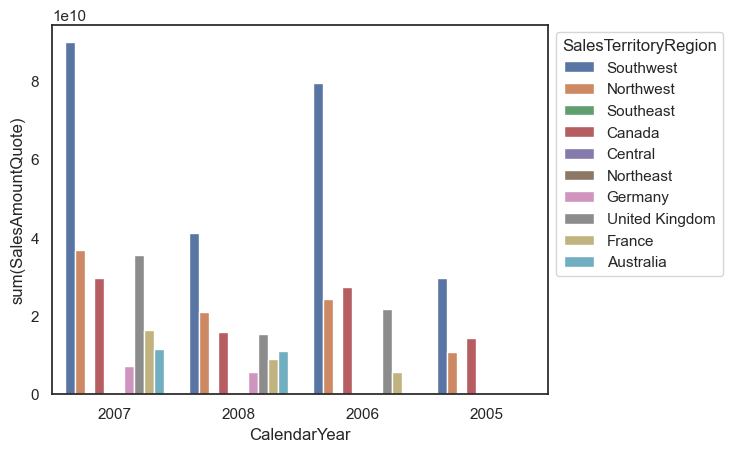

In [31]:
aa=sns.barplot(x='CalendarYear',y='sum(SalesAmountQuote)', hue='SalesTerritoryRegion', data=dff)
sns.move_legend(aa, "upper left", bbox_to_anchor=(1, 1))

In [32]:
DimAccount.createOrReplaceTempView("DimAccount") 
DimCurrency.createOrReplaceTempView("DimCurrency")  
DimCustomer.createOrReplaceTempView("DimCustomer") 
DimDate.createOrReplaceTempView("DimDate") 
DimDepartmentGroup.createOrReplaceTempView("DimDepartmentGroup")
DimGeography.createOrReplaceTempView("DimGeography")
DimOrganization.createOrReplaceTempView("DimOrganization")
DimProduct.createOrReplaceTempView("DimProduct")
DimProductCategory.createOrReplaceTempView("DimProductCategory")
DimProductSubcategory.createOrReplaceTempView("DimProductSubcategory")
DimPromotion.createOrReplaceTempView("DimPromotion")
DimReseller.createOrReplaceTempView("DimReseller")
DimSalesReason.createOrReplaceTempView("DimSalesReason")
DimSalesTerritory.createOrReplaceTempView("DimSalesTerritory")
DimScenario.createOrReplaceTempView("DimScenario")
FactCallCenter.createOrReplaceTempView("FactCallCenter")
FactCurrencyRate.createOrReplaceTempView("FactCurrencyRate")
FactFinance.createOrReplaceTempView("FactFinance")
FactInternetSales.createOrReplaceTempView("FactInternetSales")
FactSalesTargets.createOrReplaceTempView("FactSalesTargets")


DimAccount"
"DimCurrency" 
"DimCustomer"
"DimDate"
"DimDepartmentGroup"
"DimGeography"
"DimOrganization"
"DimProduct"
"DimProductCategory"
"DimProductSubcategory"
"DimPromotion"
"DimReseller"
"DimSalesReason"
"DimSalesTerritory"
"DimScenario"
"FactCallCenter"
"FactCurrencyRate"
"FactFinance"
"FactInternetSales"
"FactSalesTargets"

In [33]:
FactSalesTargets.show(2)

+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|Row|SalesTerritoryKey|SalesTerritoryRegion|SalesTerritoryGroup|SalesTerritoryCountry|CalendarYear|   DateKey|SalesAmountQuote|
+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|  1|                1|           Northwest|      North America|        United States|        2006|01/01/2006|         2693000|
|  2|                1|           Northwest|      North America|        United States|        2007|01/01/2007|         4102000|
+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
only showing top 2 rows



In [34]:
test = spark.sql("SELECT * FROM DimProduct LIMIT 2")
test.show()

+----------+-------------------+---------------------+---------------------+-------------------+------------------+------------------+-----------------+------------+-----------------+-----+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+---------+------------------+-------+
|ProductKey|ProductAlternateKey|ProductSubcategoryKey|WeightUnitMeasureCode|SizeUnitMeasureCode|EnglishProductName|SpanishProductName|FrenchProductName|StandardCost|FinishedGoodsFlag|Color|SafetyStockLevel|ReorderPoint|ListPrice|Size|SizeRange|Weight|DaysToManufacture|ProductLine|DealerPrice|Class|Style|ModelName|EnglishDescription| Status|
+----------+-------------------+---------------------+---------------------+-------------------+------------------+------------------+-----------------+------------+-----------------+-----+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+---------

In [35]:
FactInternetSales.printSchema()

root
 |-- ProductKey: string (nullable = true)
 |-- OrderDateKey: string (nullable = true)
 |-- DueDateKey: string (nullable = true)
 |-- ShipDateKey: string (nullable = true)
 |-- CustomerKey: string (nullable = true)
 |-- PromotionKey: string (nullable = true)
 |-- CurrencyKey: string (nullable = true)
 |-- SalesTerritoryKey: string (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: string (nullable = true)
 |-- RevisionNumber: string (nullable = true)
 |-- OrderQuantity: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- ExtendedAmount: string (nullable = true)
 |-- UnitPriceDiscountPct: string (nullable = true)
 |-- DiscountAmount: string (nullable = true)
 |-- ProductStandardCost: string (nullable = true)
 |-- TotalProductCost: string (nullable = true)
 |-- SalesAmount: long (nullable = true)
 |-- TaxAmt: string (nullable = true)
 |-- Freight: string (nullable = true)
 |-- CarrierTrackingNumber: string (nullable = true)

In [36]:
#Analizing Sales with regards to product category

CategorySales = spark.sql("SELECT Prodcat.EnglishProductCategoryName, SUM(Fis.SalesAmount) TotalSalesAmount, sum(Fis.OrderQuantity) QuantityOrdered FROM FactInternetSales Fis \
                          INNER JOIN DimProduct Prod on Fis.ProductKey = Prod.ProductKey \
                          INNER JOIN DimProductCategory Prodcat on Prod.ProductSubcategoryKey = Prodcat.ProductCategoryKey \
                          INNER JOIN DimCurrency Cur ON Fis.CurrencyKey = Cur.CurrencyKey \
                          WHERE CurrencyAlternateKey = 'USD' \
                          GROUP BY Prodcat.EnglishProductCategoryName \
                          ORDER BY SUM(Fis.SalesAmount)")


CategorySales.show()

+--------------------------+----------------+---------------+
|EnglishProductCategoryName|TotalSalesAmount|QuantityOrdered|
+--------------------------+----------------+---------------+
|                  Clothing|         2058894|         1174.0|
|                     Bikes|         5243877|         2707.0|
|                Components|         6797598|         3988.0|
+--------------------------+----------------+---------------+



<Axes: xlabel='TotalSalesAmount', ylabel='EnglishProductCategoryName'>

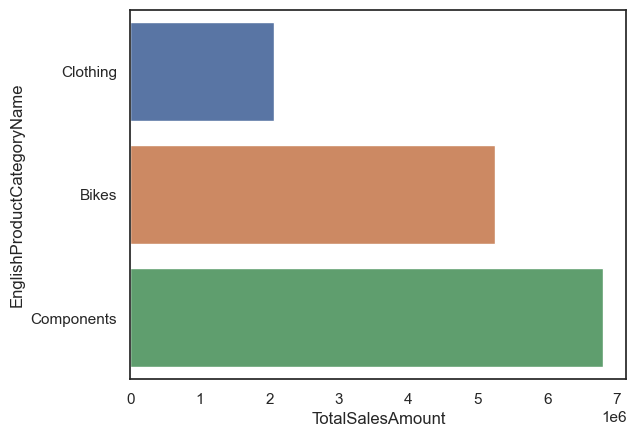

In [37]:
catSalesviz = CategorySales.toPandas()

sns.barplot(x='TotalSalesAmount',y= 'EnglishProductCategoryName',  data=catSalesviz)


In [38]:
SalesByYear = spark.sql("SELECT left(OrderDateKey,4) Year, SUM(Fis.SalesAmount) TotalSalesAmount, \
                          round(sum(TotalProductCost),2) ProductTotalCost, \
                          round(sum(TaxAmt),2) TotalTaxPaid, round(sum(Freight),2) TotalFreight, \
                          round(SUM(Fis.SalesAmount) - round(sum(TotalProductCost),2) - round(sum(TaxAmt),2) -round(sum(Freight),2),2) Profit\
                          FROM FactInternetSales Fis \
                          INNER JOIN DimCurrency Cur ON Fis.CurrencyKey = Cur.CurrencyKey \
                          WHERE CurrencyAlternateKey = 'USD' \
                          GROUP BY left(OrderDateKey,4) \
                          ORDER BY SUM(Fis.SalesAmount) DESC")


SalesByYear.show()

+----+----------------+----------------+------------+------------+----------+
|Year|TotalSalesAmount|ProductTotalCost|TotalTaxPaid|TotalFreight|    Profit|
+----+----------------+----------------+------------+------------+----------+
|2013|         8778720|      5122072.74|   704215.21|   220068.54|2732363.51|
|2011|         3085267|      1852694.32|   246848.03|    77140.06| 908584.59|
|2012|         2743762|      1607520.36|   219571.72|    68616.21| 848053.71|
|2014|           44035|        20141.78|     3655.58|     1142.45|  19095.19|
|2010|           14832|         8839.18|     1186.71|      370.85|   4435.26|
+----+----------------+----------------+------------+------------+----------+



In [39]:
#Analizing Shift type

CallCenter = spark.sql("SELECT Shift, sum(Calls) NumberOfCalls, round(sum(AutomaticResponses)/sum(Calls),2) PercOfAutoResponse, \
                        sum(IssuesRaised) NumOfIssueRaused, sum(LevelOneOperators)LOneOp, sum(LevelTwoOperators) LTwoOp,\
                        round(sum(Calls)/sum(TotalOperators),2) CallsPerOp\
                        FROM FactCallCenter\
                        GROUP BY Shift")


CallCenter.show()

+--------+-------------+------------------+----------------+------+------+----------+
|   Shift|NumberOfCalls|PercOfAutoResponse|NumOfIssueRaused|LOneOp|LTwoOp|CallsPerOp|
+--------+-------------+------------------+----------------+------+------+----------+
|      AM|       9743.0|              0.69|            40.0|  56.0| 226.0|     34.43|
|     PM2|      15378.0|              0.69|            42.0|  99.0| 337.0|     35.27|
|     PM1|      12596.0|              0.68|            34.0|  81.0| 290.0|     33.68|
|midnight|       5632.0|              0.69|            46.0|  21.0| 123.0|     29.64|
+--------+-------------+------------------+----------------+------+------+----------+



In [40]:
import matplotlib.pyplot as plt

In [41]:
plotdata=CallCenter.toPandas()

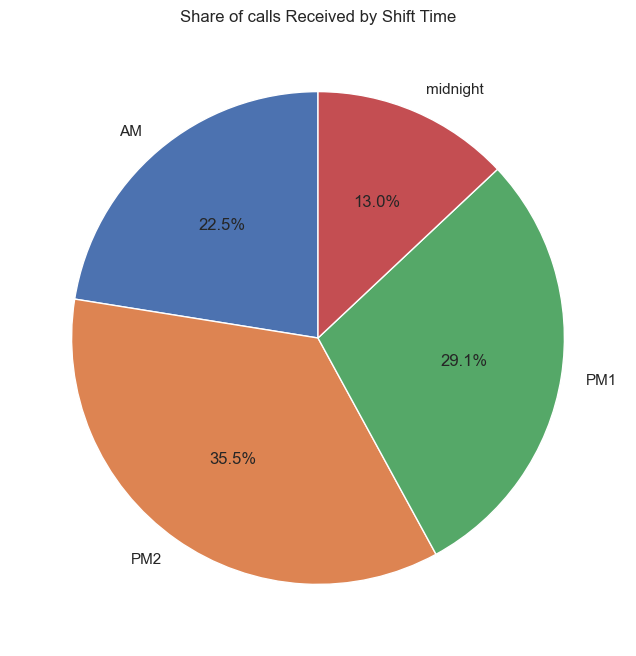

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(plotdata['NumberOfCalls'], labels=plotdata['Shift'], autopct='%1.1f%%', startangle=90)
plt.title('Share of calls Received by Shift Time')
plt.show()

### Exploring the Data before Linear Regression

In [63]:
#Get data set for EDA
ExData = spark.sql("SELECT Shift,cast(Calls as float), cast(AutomaticResponses as float), cast(Orders as float), cast(AverageTimePerIssue as float) \
                    FROM FactCallCenter")


ExData.show(3)

+-----+-----+------------------+------+-------------------+
|Shift|Calls|AutomaticResponses|Orders|AverageTimePerIssue|
+-----+-----+------------------+------+-------------------+
|   AM|405.0|             283.0| 341.0|               79.0|
|  PM1|389.0|             256.0| 251.0|               94.0|
|  PM2|358.0|             268.0| 255.0|               92.0|
+-----+-----+------------------+------+-------------------+
only showing top 3 rows



In [64]:
df_expl = ExData.toPandas()

In [330]:
df_expl.describe()

,Calls,AutomaticResponses,Orders,AverageTimePerIssue
count,120.000000,120.000000,120.000000,120.000000
mean,361.241669,248.616669,251.808334,79.841667
std,145.924088,107.327827,104.412827,13.763913
min,72.000000,58.000000,50.000000,44.000000
25%,237.750000,166.000000,161.750000,70.000000
50%,373.500000,245.000000,253.500000,81.000000
75%,454.250000,329.000000,315.000000,88.250000
max,699.000000,513.000000,539.000000,120.000000


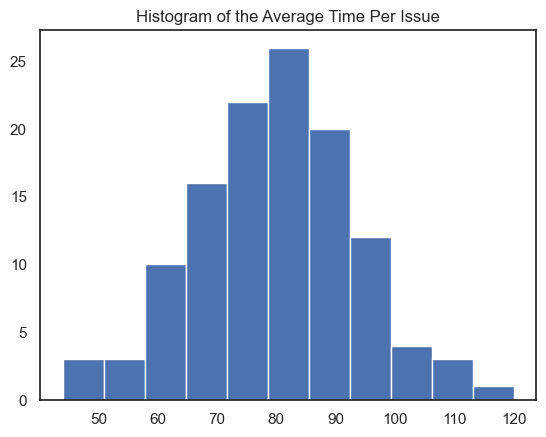

In [65]:
plt.hist(df_expl['AverageTimePerIssue'], bins=11)
plt.title("Histogram of the Average Time Per Issue")
plt.show()

### Box Plot

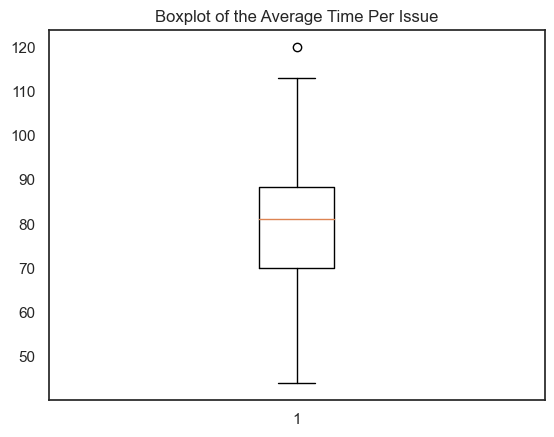

In [66]:
plt.boxplot(df_expl['AverageTimePerIssue'])
plt.title("Boxplot of the Average Time Per Issue")
plt.show()

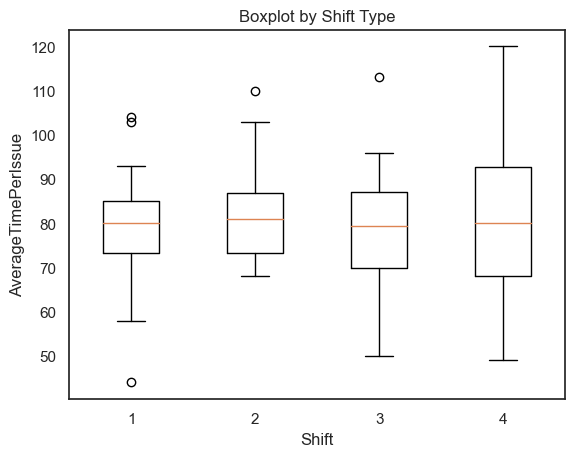

In [72]:
am = df_expl[df_expl['Shift']=='AM']
pm1 = df_expl[df_expl['Shift']=='PM1']
pm2 = df_expl[df_expl['Shift']=='PM2']
midnight = df_expl[df_expl['Shift']=='midnight']


plt.boxplot([am['AverageTimePerIssue'],pm1['AverageTimePerIssue'],pm2['AverageTimePerIssue'],midnight['AverageTimePerIssue']])
plt.xlabel('Shift')
plt.ylabel('AverageTimePerIssue')
plt.title("Boxplot by Shift Type")
plt.show()

### Line Plot

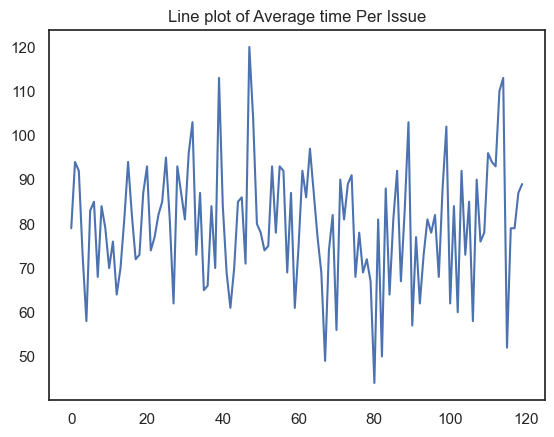

In [77]:
plt.plot(df_expl['AverageTimePerIssue'])
plt.title("Line plot of Average time Per Issue")
plt.show()

### Scatter Plot

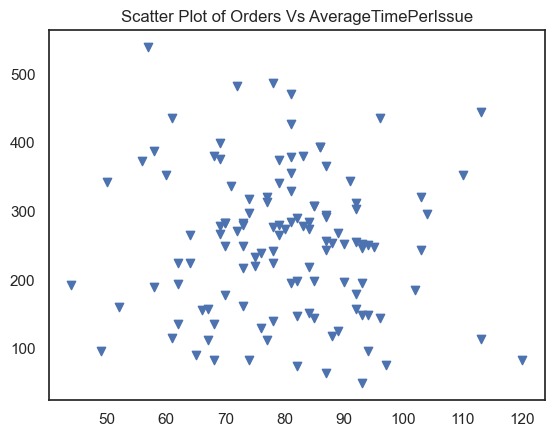

In [79]:
plt.scatter(df_expl['AverageTimePerIssue'], df_expl['Orders'], marker='v') 
plt.title("Scatter Plot of Orders Vs AverageTimePerIssue")
plt.show()

### Bar Plot

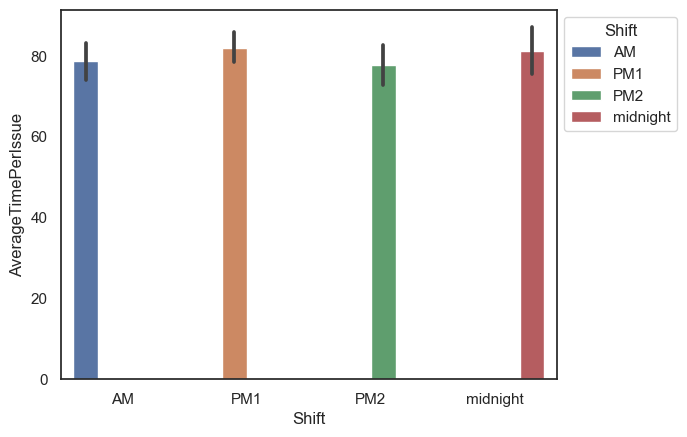

In [83]:
tt=sns.barplot(x='Shift',y= 'AverageTimePerIssue',hue='Shift',  data=df_expl)
sns.move_legend(tt, "upper left", bbox_to_anchor=(1, 1))

### Density Plot

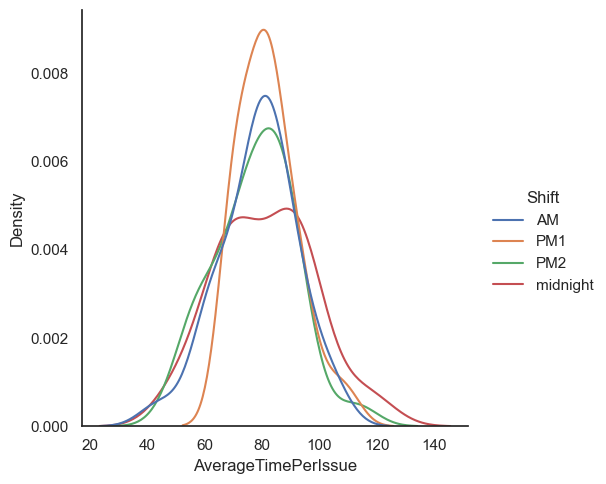

In [85]:
sns.displot(data=df_expl, x='AverageTimePerIssue', kind='kde', hue='Shift');

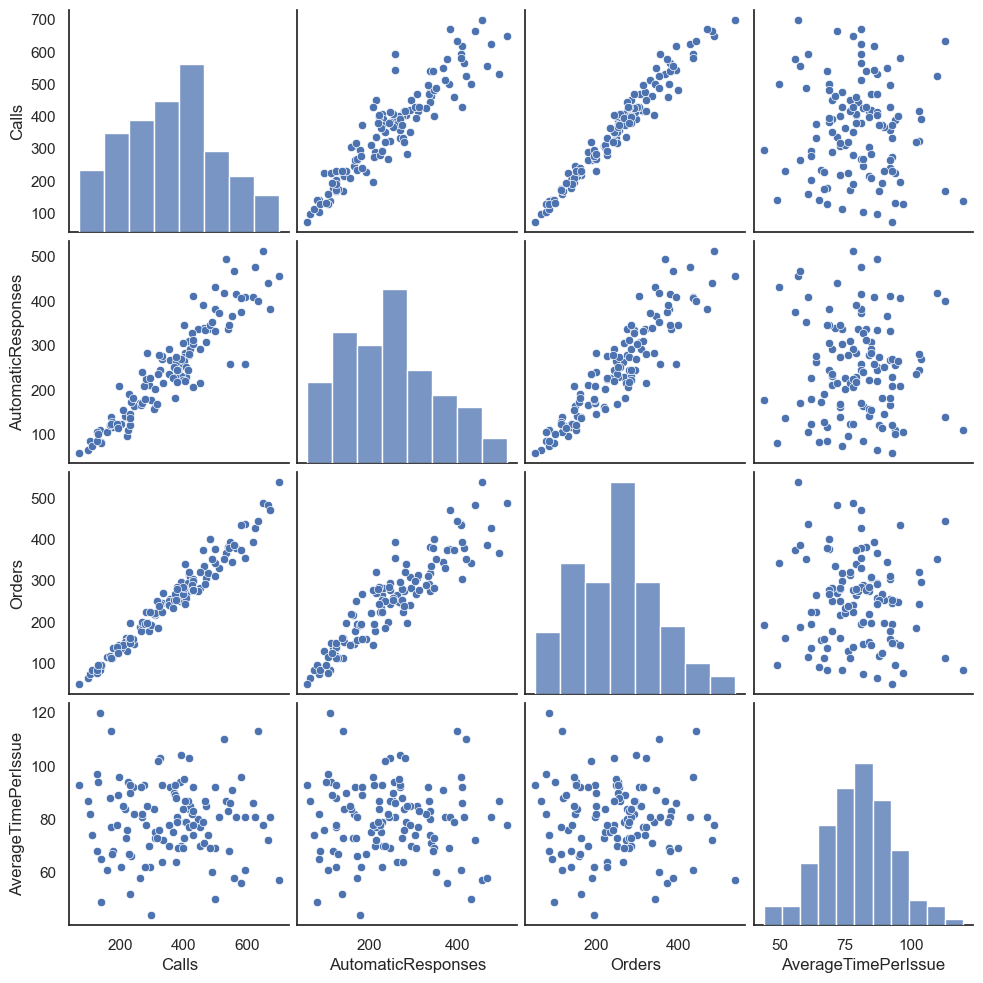

In [331]:
sns.pairplot(df_expl) 

In [332]:
import numpy as np
from scipy import stats

In [334]:
#T.Test to check if the average time to resolve an issue is the same for both PM1 and PM2 
t_stat, p_value = stats.ttest_ind(pm1['AverageTimePerIssue'],pm2['AverageTimePerIssue'])
p_value

0.17369018279079804

In [336]:
#ANOVA test for variance
from scipy.stats import f_oneway
f_oneway(am['AverageTimePerIssue'],pm1['AverageTimePerIssue'],pm2['AverageTimePerIssue'],midnight['AverageTimePerIssue'])

F_onewayResult(statistic=0.6588414745707573, pvalue=0.5790163602161902)

# Linear Regression 

In [87]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [127]:
lrData = spark.sql("SELECT cast(TotalOperators as float),cast(Calls as float), cast(AutomaticResponses as float), cast(Orders as float), cast(IssuesRaised as float),cast(AverageTimePerIssue as float) FROM FactCallCenter")

lrData.show(3)

+--------------+-----+------------------+------+------------+-------------------+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|
+--------------+-----+------------------+------+------------+-------------------+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|
+--------------+-----+------------------+------+------------+-------------------+
only showing top 3 rows



In [119]:
#creating a vector assemble which will use to vertorize our features
vectorAssembler = VectorAssembler(inputCols=["TotalOperators","Calls","AutomaticResponses","Orders","IssuesRaised"], outputCol="features")

In [120]:
#transforming features into vectors
vlrData = vectorAssembler.transform(lrData)

In [121]:
vlrData.show(5)

+--------------+-----+------------------+------+------------+-------------------+--------------------+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|            features|
+--------------+-----+------------------+------+------------+-------------------+--------------------+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|[9.0,405.0,283.0,...|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|[12.0,389.0,256.0...|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|[14.0,358.0,268.0...|
|           5.0|219.0|             140.0| 162.0|         2.0|               73.0|[5.0,219.0,140.0,...|
|          10.0|264.0|             170.0| 189.0|         1.0|               58.0|[10.0,264.0,170.0...|
+--------------+-----+------------------+------+------------+-------------------+--------------------+
only showing top 5 rows



In [122]:
model_data = vlrData.select("features", "AverageTimePerIssue")

In [128]:
train_data, test_data = model_data.randomSplit([0.8, 0.2])

In [129]:
lr = LinearRegression(featuresCol="features", labelCol="AverageTimePerIssue")
model = lr.fit(train_data)

In [130]:
predictions = model.transform(test_data)
predictions.show()

+--------------------+-------------------+-----------------+
|            features|AverageTimePerIssue|       prediction|
+--------------------+-------------------+-----------------+
|[4.0,129.0,86.0,8...|               68.0|85.51863412783773|
|[4.0,178.0,116.0,...|               68.0|80.35635164938084|
|[5.0,174.0,128.0,...|               67.0| 85.8911736711839|
|[5.0,231.0,137.0,...|               52.0| 81.1390892823684|
|[5.0,239.0,183.0,...|               92.0| 80.9506565415293|
|[7.0,225.0,111.0,...|               94.0|81.99965957351407|
|[9.0,234.0,172.0,...|               66.0|83.69850180679852|
|[9.0,405.0,283.0,...|               79.0|73.72808153163044|
|[9.0,419.0,291.0,...|               85.0|78.87201303561375|
|[10.0,266.0,167.0...|               92.0|82.79888234895498|
|[10.0,373.0,229.0...|               93.0|77.03912838275846|
|[10.0,376.0,262.0...|               64.0|81.11938133605476|
|[10.0,416.0,279.0...|               84.0|80.55342508185956|
|[12.0,380.0,244.0...|  

In [131]:
coefficients = model.coefficients
intercept = model.intercept
r2 = model.summary.r2
rmse = model.summary.rootMeanSquaredError

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Coefficients: [0.2070868386940919,0.05898628825482026,0.026632188985889916,-0.12439593807662774,2.258591554458498]
Intercept: 78.33977553238762
R-squared: 0.051735104665604936
Root Mean Squared Error: 13.78662191801356


### Decision Tree Regression

In [116]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator 
from pyspark.ml.feature import VectorAssembler

In [133]:
lrData.show(5)

+--------------+-----+------------------+------+------------+-------------------+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|
+--------------+-----+------------------+------+------------+-------------------+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|
|           5.0|219.0|             140.0| 162.0|         2.0|               73.0|
|          10.0|264.0|             170.0| 189.0|         1.0|               58.0|
+--------------+-----+------------------+------+------------+-------------------+
only showing top 5 rows



In [132]:
vectorAssembler2 = VectorAssembler(inputCols=["TotalOperators","Calls","AutomaticResponses","Orders","IssuesRaised"], outputCol="features")

In [134]:
vcal_df = vectorAssembler2.transform(lrData)

In [135]:
vcal_df.show(2)

+--------------+-----+------------------+------+------------+-------------------+--------------------+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|            features|
+--------------+-----+------------------+------+------------+-------------------+--------------------+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|[9.0,405.0,283.0,...|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|[12.0,389.0,256.0...|
+--------------+-----+------------------+------+------------+-------------------+--------------------+
only showing top 2 rows



In [178]:
#split vectorized dataset into 2 for training and testing 
splits = vcal_df.randomSplit([0.8,0.2],2)
train_df = splits[0]
test_df = splits[1]

In [179]:
train_df.count()

99

In [180]:
test_df.count()

21

In [181]:
#create a decision tree object dt
dt = DecisionTreeRegressor(featuresCol="features", labelCol="AverageTimePerIssue")

#create a decision tree model and fit the training data 
dt_model = dt.fit(train_df)

In [182]:
#make predictions by apply the transform function to our test data 
dt_predictions = dt_model.transform(test_df)

In [183]:
#evaluate how well our model performed by using the error metric evaluation root mean square error
dt_evaluator = RegressionEvaluator(labelCol="AverageTimePerIssue", predictionCol="prediction", metricName="rmse")

#calculate the root mean square error by calling the evaluator
rmse = dt_evaluator.evaluate(dt_predictions)

In [184]:
rmse

16.877876143000897

# Logistic Regression

In [154]:
from pyspark.ml.feature import StringIndexer

In [150]:
lrData2 = spark.sql("SELECT Shift,cast(TotalOperators as float),cast(Calls as float), cast(AutomaticResponses as float), cast(Orders as float), cast(IssuesRaised as float),cast(AverageTimePerIssue as float) FROM FactCallCenter")

lrData2.show(3)

+-----+--------------+-----+------------------+------+------------+-------------------+
|Shift|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|
+-----+--------------+-----+------------------+------+------------+-------------------+
|   AM|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|
|  PM1|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|
|  PM2|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|
+-----+--------------+-----+------------------+------+------------+-------------------+
only showing top 3 rows



In [151]:
#Creating a vector Assembler 
vectorAssembler3 = VectorAssembler(inputCols=["TotalOperators","Calls","AutomaticResponses","Orders","IssuesRaised","AverageTimePerIssue"], outputCol="features")

In [152]:
#Transform the data into vectors and features 
vshift_df = vectorAssembler3.transform(lrData2)
vshift_df.show(3)

+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+
|Shift|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|            features|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+
|   AM|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|[9.0,405.0,283.0,...|
|  PM1|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|[12.0,389.0,256.0...|
|  PM2|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|[14.0,358.0,268.0...|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+
only showing top 3 rows



In [155]:
#Convert the label name which is the shift column into a numeric value using string indexer 

indexer = StringIndexer(inputCol="Shift",outputCol="label")

#fiting and transfroming the vectorised data to our indexer 
ivshift_df = indexer.fit(vshift_df).transform(vshift_df)

ivshift_df.show(3)

+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+
|Shift|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|            features|label|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+
|   AM|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|[9.0,405.0,283.0,...|  0.0|
|  PM1|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|[12.0,389.0,256.0...|  1.0|
|  PM2|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|[14.0,358.0,268.0...|  2.0|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+
only showing top 3 rows



### Naive Bayes Classification

In [156]:
#importing packages to use for NaiveBayes and and Evaluator to evaluate how well our model is doing 
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [185]:
#Spliting the data into testing and training 
splits2 = ivshift_df.randomSplit([0.65,0.35],1)
train_df2 = splits2[0]
test_df2 = splits2[1]

In [187]:
train_df2.count()


85

In [188]:
test_df2.count()

35

In [189]:
#Creating a NaiveBayes Classifier 
nb = NaiveBayes(modelType="multinomial")

#Create a model so we can fit our training data into the model 
nbmodel = nb.fit(train_df2)

In [190]:
#Create a prediction model 
nb_predictions = nbmodel.transform(test_df2)

In [191]:
nb_predictions.show(2)

+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+--------------------+--------------------+----------+
|Shift|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|            features|label|       rawPrediction|         probability|prediction|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+--------------------+--------------------+----------+
|   AM|           9.0|268.0|             171.0| 196.0|         2.0|               81.0|[9.0,268.0,171.0,...|  0.0|[-1005.4129101880...|[0.94696457316137...|       0.0|
|   AM|           9.0|269.0|             241.0| 199.0|         2.0|               82.0|[9.0,269.0,241.0,...|  0.0|[-1107.2081393391...|[0.99302636744280...|       0.0|
+-----+--------------+-----+------------------+------+------------+-------------------+--------------------+-----+--------------------+--------------------+----

Looking at the first 2 rows of our prediction model we see that the label for the first two rows are 0.0 which corresponds to the AM shift, our prediction column also has 0.0 which shows that our model is predicting the type of shift properly. This however is just two rows we need to evaluate how well our model is doing. In the next line I weill create an Evaluator that will measure the accuracy of our model

In [192]:
#creating an evaluator 
evaluator_nb = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

#using the evaluate function to check accuracy of our model 
accuracy_nb = evaluator_nb.evaluate(nb_predictions)

In [193]:
#the accuracy of our model is approx 43% wich is not great 
accuracy_nb

0.42857142857142855

### Multilayer perceptron classification

This is a type of neural network which we will use to predict shift type
We have multiple level of neurons 
the first layer has the same number of nodes as there are inputs, we have 6 measures so our first layer will be 6

Layers: our input layer is 6 6 features and our ouput which are the shift type are 4, we want to have layers inbetween to help
multi-layer perceptron learn how to classify correctly, I will be inserting two more rows of 7 neurons each, so we are going 
to have a total of four layer multi-layer perceptron

In [266]:
mlData = spark.sql("SELECT cast(TotalOperators as float),cast(Calls as float), cast(AutomaticResponses as float), cast(Orders as float), cast(IssuesRaised as float),cast(AverageTimePerIssue as float),Shift FROM FactCallCenter")

mlData.show(3)

+--------------+-----+------------------+------+------------+-------------------+-----+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|Shift|
+--------------+-----+------------------+------+------------+-------------------+-----+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|   AM|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|  PM1|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|  PM2|
+--------------+-----+------------------+------+------------+-------------------+-----+
only showing top 3 rows



In [267]:
#Creating a vector Assembler 
vectorAssembler4 = VectorAssembler(inputCols=["TotalOperators","Calls","AutomaticResponses","Orders","IssuesRaised","AverageTimePerIssue"], outputCol="features")

In [268]:
#Transform the data into vectors and features 
vshift_df1 = vectorAssembler3.transform(mlData)
vshift_df1.show(3)

+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|Shift|            features|
+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|   AM|[9.0,405.0,283.0,...|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|  PM1|[12.0,389.0,256.0...|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|  PM2|[14.0,358.0,268.0...|
+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+
only showing top 3 rows



In [269]:
#Convert the label name which is the shift column into a numeric value using string indexer 

indexer = StringIndexer(inputCol="Shift",outputCol="label")

#fiting and transfroming the vectorised data to our indexer 
ivshift_df1 = indexer.fit(vshift_df1).transform(vshift_df1)

ivshift_df1.show(3)

+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+-----+
|TotalOperators|Calls|AutomaticResponses|Orders|IssuesRaised|AverageTimePerIssue|Shift|            features|label|
+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+-----+
|           9.0|405.0|             283.0| 341.0|         2.0|               79.0|   AM|[9.0,405.0,283.0,...|  0.0|
|          12.0|389.0|             256.0| 251.0|         1.0|               94.0|  PM1|[12.0,389.0,256.0...|  1.0|
|          14.0|358.0|             268.0| 255.0|         1.0|               92.0|  PM2|[14.0,358.0,268.0...|  2.0|
+--------------+-----+------------------+------+------------+-------------------+-----+--------------------+-----+
only showing top 3 rows



In [270]:
#Spliting the data into testing and training 
splits3 = ivshift_df1.randomSplit([0.65,0.35],1)
train_df3 = splits3[0]
test_df3 = splits3[1]

In [271]:
train_df3.count()

85

In [272]:
test_df3.count()

35

In [273]:
ivshift_df1.count()

120

In [199]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [324]:
#specifying the layers we want in our multi-layer perceptron
layers = [6,7,7,4]

In [325]:
#creating a multilayer classifier and feeding our layers to it setting seed to 3 because or ramdomness
mlp = MultilayerPerceptronClassifier(layers=layers,seed=3)

In [326]:
#fit the model with the train data from earlier 
mlp_model = mlp.fit(train_df3)

In [327]:
#make predictions with the new model
predictions_mlp = mlp_model.transform(test_df3)

In [328]:
#create and measure how accurate our model is 
evaluator_mlp = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy_mlp = evaluator_mlp.evaluate(predictions_mlp)
accuracy_mlp

0.3142857142857143